In [56]:
#comp9517 lab2
#z5196480
#huiyao zuo
#answer in the code

In [57]:
import cv2
import matplotlib.pyplot as plt
import copy
import math

In [58]:
image = cv2.imread('COMP9517_20T2_Lab2_Image.jpg')

In [59]:
descriptor = cv2.xfeatures2d.SIFT_create()    
#use the descriptor default parameters to analyse the feture dot 

In [60]:
image_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
fe_num, det = descriptor.detectAndCompute(image_gray, None)
image_fe = copy.deepcopy(image)                
#use deepcopy to get the copy of image to avoid the change to original image
cv2.drawKeypoints(image, fe_num, image_fe, color=(18,50,104))  
#use cv2.drawKeypoints to draw the feature point on the copy

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 245, 228],
        [254, 244, 227],
        [253, 243, 226]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 244, 227],
        [253, 243, 226],
        [253, 243, 226]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 243, 225],
        [253, 243, 225],
        [253, 243, 225]],

       ...,

       [[128, 107,  99],
        [131, 110, 102],
        [140, 119, 111],
        ...,
        [144, 123, 108],
        [143, 122, 107],
        [143, 123, 106]],

       [[125, 106,  99],
        [127, 108, 101],
        [129, 110, 103],
        ...,
        [144, 122, 110],
        [143, 121, 109],
        [144, 123, 108]],

       [[123, 104,  97],
        [123, 104,  97],
        [131, 112, 105],
        ...,
        [141, 119, 108],
        [141, 119, 107],
        [144, 122, 110]]

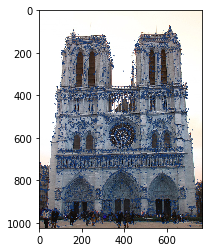

In [61]:
cv2.imwrite('image1.jpg',image_fe,[int(cv2.IMWRITE_JPEG_QUALITY),100])  #write the output photo with limited quality

plt.imshow(image_fe) #have different rgb channel but only use to observe the result

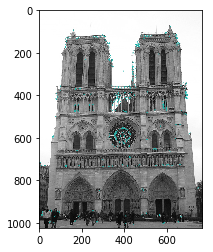

In [62]:
limited_fe_num = int(len(fe_num)*0.1)
#get the number of feature points
descriptor_2 = cv2.xfeatures2d.SIFT_create(nfeatures = limited_fe_num)
#only use 10% of fe_num to create the descriptor and use the nfeatures (answer of b)
fe_num_2, det_2 = descriptor_2.detectAndCompute(image_gray, None)

image_fe_2 = copy.deepcopy(image)

cv2.drawKeypoints(image_gray, fe_num_2, image_fe_2, color=(32,178,170))
#use cv2.drawKeypoints to draw the feature point on the copy
cv2.imwrite('image2.jpg',image_fe_2,[int(cv2.IMWRITE_JPEG_QUALITY),100])
#write the output photo with limited quality
plt.imshow(image_fe_2)

#image1 = a image2 = b   ,the approuch used is nfeatures

In [63]:
#task2

In [64]:
height, width = int(image.shape[0]*1.15), int(image.shape[1]*1.15)
#get the scale height and width
image_scale = cv2.resize(image, dsize=(width, height), interpolation=cv2.INTER_NEAREST)
#get the resize image though the cv2.resize

In [65]:
image_scale_grey = cv2.cvtColor(image_scale,cv2.COLOR_RGB2GRAY)

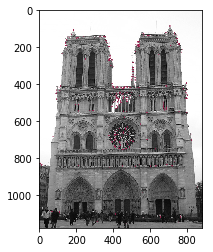

In [66]:
fe_num_scale, det_scale = descriptor_2.detectAndCompute(image_scale_grey, None)
#get the fe_num_scale though the descriptor_2 with limited feature number
image_scale_2 = copy.deepcopy(image_scale)
#copy the image_scale
cv2.drawKeypoints(image_scale_grey, fe_num_scale, image_scale_2, color=(149,28,72))

cv2.imwrite('image3.jpg',image_scale_2,[int(cv2.IMWRITE_JPEG_QUALITY),100])
plt.imshow(image_scale_2)

In [67]:
matcher = cv2.BFMatcher()
#use cv2.BFMatcher() ro do match 
matche_scale = matcher.knnMatch(det_2, det_scale,k=2)
#match the two image

good_match_scale = []
for i, (m, n) in enumerate(matche_scale):
    if m.distance < 0.75* n.distance:
        good_match_scale.append(m)

matche_scale = sorted(good_match_scale, key = lambda x:x.distance)
#sort the match
image_m = cv2.drawMatches(image_gray,fe_num_2,image_scale_grey,fe_num_scale,matche_scale[:6], None,flags=2)

best match five point
(250.6097412109375, 263.74200439453125)
(505.3522644042969, 321.1237487792969)
(505.3522644042969, 321.1237487792969)
(516.3179931640625, 364.63140869140625)
(505.2503967285156, 333.3853454589844)
(777.6356201171875, 395.6225280761719)


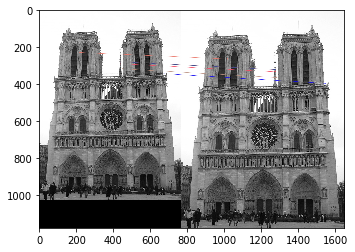

In [71]:
cv2.imwrite('image4.jpg',image_m,[int(cv2.IMWRITE_JPEG_QUALITY),100])
plt.imshow(image_m)
print("best match five point")
for m in matche_scale[:6]:
    print(fe_num_scale[m.trainIdx].pt)

In [72]:
#(c)the two image's keypoints  roughly the same ,but still have little different , 
#by compare two keypionts images get this .
#image3 = b      image4 = d
#and the ratio use 0.57 because if it grow larger ,the result will overlap
#since two are overlap ,so i add one more match

In [73]:
#task 3

In [74]:
center = image.shape[0]//2,image.shape[1]//2
#get the center

In [75]:
rot_matrix = cv2.getRotationMatrix2D((center[0], center[1]), 60, 1.0)
#get the rot_matrix
height, weight = image.shape[:2]
#get the height and weight
img_rotate_1 = cv2.warpAffine(image, rot_matrix, (weight, height))
#get the rotate image

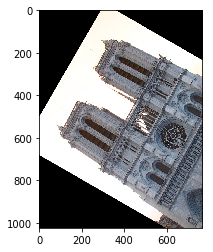

In [76]:
plt.imshow(img_rotate_1)

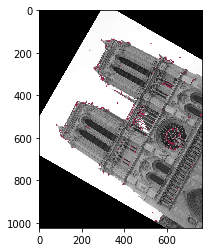

In [77]:
img_rotate_1_grey = cv2.cvtColor(img_rotate_1,cv2.COLOR_RGB2GRAY)

fe_num_rotate_r, det_rotate_r = descriptor_2.detectAndCompute(img_rotate_1_grey , None)

image_rotate_c = copy.deepcopy(img_rotate_1)
#copy the image_scale
cv2.drawKeypoints(img_rotate_1_grey, fe_num_rotate_r, image_rotate_c, color=(149,28,72))

cv2.imwrite('image5.jpg',image_rotate_c,[int(cv2.IMWRITE_JPEG_QUALITY),100])
plt.imshow(image_rotate_c)

In [80]:
matche_scale_c = matcher.knnMatch(det_2, det_rotate_r,k=2)
#match the two image
good_match_scale = []

for i, (m, n) in enumerate(matche_scale_c):
    if m.distance < 0.75* n.distance:
        good_match_scale.append(m)

matche_scale_c = sorted(good_match_scale, key = lambda x:x.distance)
#sort the match

image_r = cv2.drawMatches(image_gray,fe_num_2,img_rotate_1_grey,fe_num_rotate_r,matche_scale_c[:6], None,flags=2)


best match five point
(403.17230224609375, 406.2285461425781)
(403.17230224609375, 406.2285461425781)
(183.3332977294922, 429.7347412109375)
(291.3429260253906, 324.08563232421875)
(532.1345825195312, 530.8817138671875)
(384.4791259765625, 395.1697998046875)


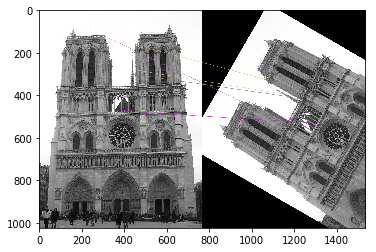

In [82]:
cv2.imwrite('image6.jpg',image_r,[int(cv2.IMWRITE_JPEG_QUALITY),100])
plt.imshow(image_r)
print("best match five point")

for m in matche_scale_c[:6]:
    print(fe_num_rotate_r[m.trainIdx].pt)

In [70]:
#image5 =  b image6 = d  
#answer to c ,this keypoint is closely same ,but still have some spot is different.
#get this by compare the image .and find some point is marked in one image and other is not.
#use ratio 0.17 beacuse it is the largest number to avoid overlap .
#since two are overlap ,so i add one more match